# Question 1 Gradient Discent

In [1]:
import numpy as np
import math
import pylab as pl
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def negativeGaussian(x,mu,Sigma):
    """
        A function to output the value and the gradient for the negative Gaussian function
        given the value and meand & coariance matrix for the Gaussian
    """
    
    detSigma = np.linalg.det(Sigma)
    n = len(x)
    NC = -(1/(np.sqrt(((2*math.pi)**n)*detSigma))) # normalizing constant
    normalizedX = [a - b for a, b in zip(x, mu)] 
    invSigma = np.linalg.inv(Sigma)
    
    kernel = np.exp(-0.5*(np.inner(np.inner(normalizedX,invSigma),np.transpose(normalizedX))))
    value = NC*kernel
    gradient = [-value*a for a in np.inner(invSigma,normalizedX)]
    
    return(value,gradient)
    

In [2]:
def qBowl(x,b,A):
    """
        Caculated the value and the gradient for the quadratic bowl function
    """
    
    quadForm = 0.5*np.inner(np.inner(np.transpose(x),A),x)
    dotForm = np.inner(np.transpose(x),b)
    
    value = quadForm - dotForm
    gradient = [a-b for a,b in zip(np.inner(A,x),b)]
    return (value,gradient)

In [4]:
a = [25,25]
mu = [1,3]
A = [[1,0],[0,1]]


In [5]:
qBowl(a,mu,A)

(525.0, [24, 22])

In [6]:
def batchGradientDiscent(function,initGuess,step,threshold,maxIter,*args):
    """
        Wrapper function to conduct bacth gradeint descent. Inputs are intiial guess, step size
        for the gradient descent, error tolerance, number of iteration and the function to be 
        evaluated
    
    """
    
    
    gradientNorm = []
    epsilon = 1
    errorPropagation = []
    iteration = 0

    while epsilon > threshold and iteration < maxIter : 
        if iteration==0:
            
            value = [float(i) for i in initGuess]
        
        output = function(value,*args)
        evaluateOld = function(value,*args)[0] # function evaluated at old point
        gradient = [float(i) for i in output[1]]
        change = [a*step for a in gradient]
        newValue = [a - b for a,b in zip(value,change)] #GDS equation
        
        evaluateNew = function(newValue,*args)[0]# function evaluated at new point
        epsilon = abs(evaluateNew - evaluateOld)
        value = newValue
        gradient= function(value,*args)[1]
        gNorm = np.linalg.norm(gradient)
        gradientNorm.append(gNorm)
        
        
        errorPropagation.append(epsilon)
        iteration+=1
        
          
        
        
    return(gradientNorm, errorPropagation,value,iteration)

In [7]:
# Loading the parameters
def getData():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('../DataFiles/HW1/parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 



In [8]:
gaussMean,gaussCov,quadBowlA,quadBowlb = getData()

In [9]:
step = 1/(np.linalg.norm(negativeGaussian([15,10],gaussMean,gaussCov)[1]))
#batchGradientDiscent(negativeGaussian,[15,10],step,1e-15,130,gaussMean,gaussCov)

In [10]:
step = 1/(np.linalg.norm(qBowl([25,25],quadBowlb,quadBowlA)[1]))
batchGradientDiscent(qBowl,[25,25],step,1e-3,200,quadBowlb,quadBowlA)
print step

0.0282842712475


In [11]:
print np.linalg.norm(quadBowlA)
print quadBowlb

15.8113883008
[ 400.  400.]


Quadratic bowl shows some very erratic behavior unless the startiing point is very clos
and the threshold is relatively larger

In [12]:
# Effect of staritng guess
# Add random noise to the analtyical solution (Close to the solution, a bit far and then very far from the solution)
# For neagtive Gaussain
NGAnalyticSoln = gaussMean
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))

step = 1/(np.linalg.norm(negativeGaussian(SP1,gaussMean,gaussCov)[1]))
SP1output =  batchGradientDiscent(negativeGaussian,SP1,step,1e-10,130,gaussMean,gaussCov)
step = 1/(np.linalg.norm(negativeGaussian(SP2,gaussMean,gaussCov)[1]))
SP2output =  batchGradientDiscent(negativeGaussian,SP2,step,1e-10,130,gaussMean,gaussCov)
step = 1/(np.linalg.norm(negativeGaussian(SP3,gaussMean,gaussCov)[1]))
SP3output =  batchGradientDiscent(negativeGaussian,SP3,step,1e-10,130,gaussMean,gaussCov)

In [13]:
#SP1output

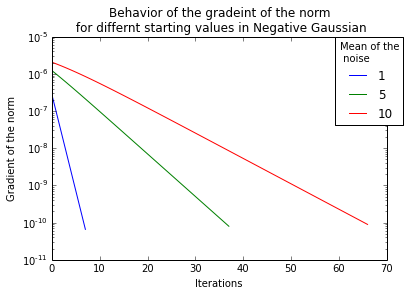

In [14]:
# Image for satring guess plot
plt.plot(SP1output[1],label ='1' )
plt.plot(SP2output[1],label = '5')
plt.plot(SP3output[1],label = '10')
#plt.plot(X,Y,'o')
#plt.plot(xtrue,fValue0)
plt.xlabel('Iterations')
plt.ylabel('Gradient of the norm')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.,title = "Mean of the \n noise")
plt.title('Behavior of the gradeint of the norm \n for differnt starting values in Negative Gaussian')
#plt.show()
pl.savefig('../ImageFiles/HW1/BatchGradientDiscent_InitialGuess1.1.pdf')

In [15]:
# Effect of staritng guess
# Add random noise to the analtyical solution (Close to the solution, a bit far and then very far from the solution)
# For Quadratic Bowl
NGAnalyticSoln = np.inner(np.linalg.inv(quadBowlA),quadBowlb)

SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))

step = 1/(np.linalg.norm(qBowl(SP1,quadBowlb,quadBowlA)[1]))
SP1output =  batchGradientDiscent(qBowl,SP1,step,1e-10,1000,quadBowlb,quadBowlA)
step = 1/(np.linalg.norm(qBowl(SP2,quadBowlb,quadBowlA)[1]))
SP2output =  batchGradientDiscent(qBowl,SP2,step,1e-10,1000,quadBowlb,quadBowlA)
step = 1/(np.linalg.norm(qBowl(SP3,quadBowlb,quadBowlA)[1]))
SP3output =  batchGradientDiscent(qBowl,SP3,step,1e-10,1000,quadBowlb,quadBowlA)

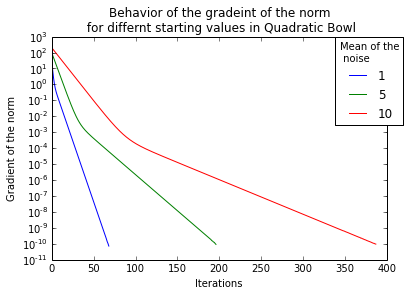

In [16]:
# Image for satring guess plot
plt.plot(SP1output[1],label ='1' )
plt.plot(SP2output[1],label = '5')
plt.plot(SP3output[1],label = '10')
#plt.plot(X,Y,'o')
#plt.plot(xtrue,fValue0)
plt.xlabel('Iterations')
plt.ylabel('Gradient of the norm')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.,title = "Mean of the \n noise")
plt.title('Behavior of the gradeint of the norm \n for differnt starting values in Quadratic Bowl')
pl.savefig('../ImageFiles/HW1/BatchGradientDiscent_InitialGuess1.1_QBowl.pdf')
#plt.show()
#plt.show()

In [17]:
# Step size

In [18]:
# Comparing step sizes
NGAnalyticSoln = gaussMean
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(negativeGaussian(SP3,gaussMean,gaussCov)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20


#for i in range(10):
SP1output =  batchGradientDiscent(negativeGaussian,SP3,step,1e-8,1000,gaussMean,gaussCov)
SP2output =  batchGradientDiscent(negativeGaussian,SP3,step2,1e-8,1000,gaussMean,gaussCov)

SP3output =  batchGradientDiscent(negativeGaussian,SP3,step3,1e-8,1000,gaussMean,gaussCov)
SP4output =  batchGradientDiscent(negativeGaussian,SP3,step4,1e-8,1000,gaussMean,gaussCov)
SP5output =  batchGradientDiscent(negativeGaussian,SP3,step5,1e-8,1000,gaussMean,gaussCov)
    

a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]
e =  SP5output[1]

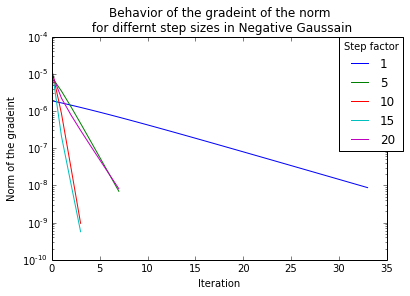

In [19]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='15')
plt.plot(range(len(e)),e,label='20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.,title = "Step factor")
plt.xlabel('Iteration')
plt.ylabel('Norm of the gradeint')
plt.title('Behavior of the gradeint of the norm \n for differnt step sizes in Negative Gaussain')
plt.yscale('log')
#plt.show()
pl.savefig('../ImageFiles/HW1/BatchGradientDiscent_StepSize.1_NG.pdf')

In [20]:
# Comparing step sizes
NGAnalyticSoln = np.inner(np.linalg.inv(quadBowlA),quadBowlb)
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(qBowl(SP3,quadBowlb,quadBowlA)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20


#for i in range(10):
SP1output =  batchGradientDiscent(qBowl,SP3,step,1e-10,1000,quadBowlb,quadBowlA)
SP2output =  batchGradientDiscent(qBowl,SP3,step2,1e-10,1000,quadBowlb,quadBowlA)

SP3output =  batchGradientDiscent(qBowl,SP3,step3,1e-10,1000,quadBowlb,quadBowlA)
SP4output =  batchGradientDiscent(qBowl,SP3,step4,1e-10,1000,quadBowlb,quadBowlA)
SP5output =  batchGradientDiscent(qBowl,SP3,step5,1e-10,1000,quadBowlb,quadBowlA)   

a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]
e =  SP5output[1]

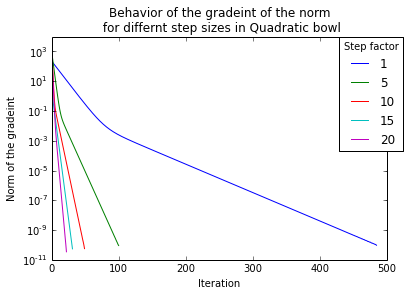

In [21]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='15')
plt.plot(range(len(e)),e,label='20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.,title = "Step factor")
plt.xlabel('Iteration')
plt.ylabel('Norm of the gradeint')
plt.title('Behavior of the gradeint of the norm \n for differnt step sizes in Quadratic bowl')
plt.yscale('log')
#plt.show()
pl.savefig('../ImageFiles/HW1/BatchGradientDiscent_StepSize.1_QBowl.pdf')

# Convergence Criterion

In [22]:
# Using aboslute deviation vs gradeint of the norm as the convergence criterion

In [23]:
def batchGradientDiscent(function,initGuess,step,threshold,maxIter,*args):
    gradientNorm = []
    epsilon = 1
    errorPropagation = []
    iteration = 0
    
    while epsilon > threshold and iteration < maxIter : 
        if iteration==0:
            
            value = [float(i) for i in initGuess]
        
        output = function(value,*args)
        evaluateOld = function(value,*args)[0] # function evaluated at old point
        gradient = [float(i) for i in output[1]]
        change = [a*step for a in gradient]
        newValue = [a - b for a,b in zip(value,change)] #GDS equation
        evaluateNew = function(newValue,*args)[0]# function evaluated at new point
        
        #epsilon = abs(evaluateNew - evaluateOld)
        value = newValue
        gradient= function(value,*args)[1]
        gNorm = np.linalg.norm(gradient)
        epsilon = gNorm
        gradientNorm.append(gNorm)
        errorPropagation.append(epsilon)
        iteration+=1
        
          
        
        
    return(gradientNorm, errorPropagation,value,iteration)

In [24]:
# Using absolute deviation
NGAnalyticSoln = np.inner(np.linalg.inv(quadBowlA),quadBowlb)
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(qBowl(SP3,quadBowlb,quadBowlA)[1])
step2 = step*10
SP1output_AbsDiff_QBowl =  batchGradientDiscent(qBowl,SP3,step,1e-8,1000,quadBowlb,quadBowlA)
SP2output_AbsDiff_QBowl =  batchGradientDiscent(qBowl,SP3,step2,1e-8,1000,quadBowlb,quadBowlA)

NGAnalyticSoln = gaussMean

SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))


step = 1/(np.linalg.norm(negativeGaussian(SP3,gaussMean,gaussCov)[1]))
step2 = step*10
SP1output_AbsDiff_NG =  batchGradientDiscent(negativeGaussian,SP3,step,1e-8,1000,gaussMean,gaussCov)
SP2output_AbsDiff_NG =  batchGradientDiscent(negativeGaussian,SP3,step2,1e-8,1000,gaussMean,gaussCov)

In [25]:
NGAnalyticSoln = np.inner(np.linalg.inv(quadBowlA),quadBowlb)
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(qBowl(SP3,quadBowlb,quadBowlA)[1])
step2 = step*10
SP1output_Ngrad_QBowl =  batchGradientDiscent(qBowl,SP3,step,1e-8,1000,quadBowlb,quadBowlA)
SP2output_Ngrad_QBowl =  batchGradientDiscent(qBowl,SP3,step2,1e-8,1000,quadBowlb,quadBowlA)

NGAnalyticSoln = gaussMean
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/(np.linalg.norm(negativeGaussian(SP3,gaussMean,gaussCov)[1]))
step2 = step*10
SP1output_Ngrad_NG = batchGradientDiscent(negativeGaussian,SP3,step,1e-8,1000,gaussMean,gaussCov)
SP2output_Ngrad_NG = batchGradientDiscent(negativeGaussian,SP3,step2,1e-8,1000,gaussMean,gaussCov)

In [26]:
print SP1output_Ngrad_QBowl[3]
print SP1output_Ngrad_NG[3]
print SP2output_Ngrad_QBowl[3]
print SP2output_Ngrad_NG[3]

808
67
72
4


In [27]:
print SP1output_AbsDiff_QBowl[3]
print SP1output_AbsDiff_NG[3]
print SP2output_AbsDiff_QBowl[3]
print SP2output_AbsDiff_NG[3]

778
56
70
3


In [28]:
ConvCritIteration_AbsDiff = [SP1output_AbsDiff_QBowl[3],SP1output_AbsDiff_NG[3],SP2output_AbsDiff_QBowl[3],SP2output_AbsDiff_NG[3]]
ConvCritIteration_NGrad = [SP1output_Ngrad_QBowl[3],SP1output_Ngrad_NG[3],SP2output_Ngrad_QBowl[3],SP2output_Ngrad_NG[3]]

In [29]:
ConvCritIteration_NGrad

[808, 67, 72, 4]

# Question 1.2

In [30]:
def finiteDifference(function,sp,h,*args):

    fdApprox = []
    for i in range(len(sp)):
        Lower = [float(j) for j in sp]
        Higher = [float(j) for j in sp]
        Lower[i] = Lower[i] - 0.5*h
        #print Lower
        Higher[i] = Higher[i] + 0.5*h
        higherValue = function(Higher,*args)[0]
        lowerValue = function(Lower,*args)[0]

        fdApprox.append((higherValue - lowerValue)/h)

    return(fdApprox)


In [31]:
finiteDifference(qBowl,[1,2],10000,quadBowlb,quadBowlA)

[-380.0, -375.0]

In [32]:
qBowl([1,2],quadBowlb,quadBowlA)

(-1165.0, [-380.0, -375.0])

In [33]:
# Finite difference comparison
Sp= [5,7]
Sp2 = [26.5,2.56]
print negativeGaussian(Sp,gaussMean,gaussCov)[1]
h = [1000000,1000,10,1,0.1,0.01,0.001]
NGfiniteDifferenceList = []
QBowlfiniteDifferenceList = []
for i in range(len(h)):
    fdNG = finiteDifference(negativeGaussian,Sp,h[i],gaussMean,gaussCov)
    AnNG = negativeGaussian(Sp,gaussMean,gaussCov)[1]
    NGfiniteDifferenceList.append(np.linalg.norm(np.array(fdNG) -np.array(AnNG)))
    fdQB = finiteDifference(qBowl,Sp2,h[i],quadBowlb,quadBowlA)
    AnQB = qBowl(Sp2,quadBowlb,quadBowlA)[1]
    QBowlfiniteDifferenceList.append(np.linalg.norm(np.array(fdQB) -np.array(AnQB)))
    
    
    
    
print NGfiniteDifferenceList
print  QBowlfiniteDifferenceList
W1 = [str(a) for a in h]



[-7.8236088589612688e-07, -4.6941653153767613e-07]
[9.1238173801377379e-07, 9.1238173801377379e-07, 1.1255858603595962e-08, 1.132516167540959e-10, 1.1325856140629299e-12, 1.1327115928941935e-14, 1.0178909588838726e-16]
[3.4527966077235333e-10, 2.2737367544323206e-13, 8.5265128291212022e-14, 5.6629854853927314e-13, 8.2834046967407698e-12, 8.1679765138463336e-11, 2.2150928216972346e-09]


In [34]:
finiteDifference(qBowl,Sp2,1,quadBowlb,quadBowlA)

[-122.19999999999982, -241.90000000000055]

In [35]:
print W1

['1000000', '1000', '10', '1', '0.1', '0.01', '0.001']


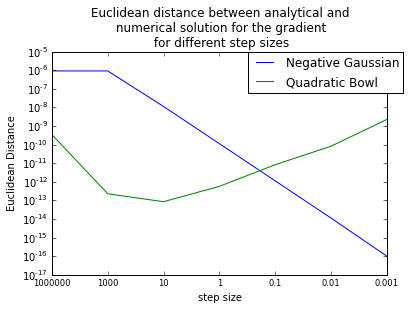

In [36]:
# Image for satring guess plot
plt.plot(range(len(NGfiniteDifferenceList)),NGfiniteDifferenceList,label="Negative Gaussian")
plt.plot( range(len(QBowlfiniteDifferenceList)),QBowlfiniteDifferenceList,label = "Quadratic Bowl")
plt.xlabel('step size')
plt.ylabel('Euclidean Distance')
plt.yscale('log')
plt.title('Euclidean distance between analytical and \n numerical solution for the gradient\n for different step sizes')

plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
pl.ylim([1e-17,1e-5])
pl.savefig('../ImageFiles/HW1/finiteDifferenceComparison_1.2.pdf')
plt.show()
#plt.show()

# # Data for SGD

In [37]:
# Loading the data

def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('../DataFiles/HW1/fittingdatap1_x.txt')
    y = pl.loadtxt('../DataFiles/HW1/fittingdatap1_y.txt')

    return (X,y) 

In [38]:
X,y = getData()

In [39]:
X.shape

(100, 10)

In [40]:
A = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X))

In [41]:
trueSp = np.inner(A,y)
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

Least Square function

In [42]:
def leastSquare(theta,X,y):
    #y = y.ravel()
    intermediate = np.inner(X,theta) - y
    value = np.inner(np.transpose(intermediate),intermediate)
    gradient = 2*np.inner(np.transpose(X),intermediate)
        
    return(value,gradient)


In [43]:
theta = [1,2,3,4,-5,6,7,8,9,-10]

In [44]:
intermediate=  np.inner(X[1,],trueSp) - y[1]
value = np.inner(np.transpose(intermediate),intermediate)
gradient = 2*np.inner(np.transpose(X[1,]),intermediate)
print gradient 
leastSquare(trueSp,X[1,],y[1])

[  8.35941938e-01   1.10289025e+03   1.02008172e+03  -1.26978323e+02
   8.43653974e+02   4.88648917e+02  -4.28681082e+02   1.83080712e+02
   6.27547270e+02  -6.35061319e+02]


(246.90447611861788,
 array([  8.35941938e-01,   1.10289025e+03,   1.02008172e+03,
         -1.26978323e+02,   8.43653974e+02,   4.88648917e+02,
         -4.28681082e+02,   1.83080712e+02,   6.27547270e+02,
         -6.35061319e+02]))

In [45]:
#np.linalg.norm(leastSquare(trueSp+0.000000001,X,y)[1])

In [46]:
print np.linalg.norm((leastSquare(trueSp,X,y)[1]))
print leastSquare(trueSp,X,y)[1]

8.08898029578e-10
[  7.22795585e-11   3.46213943e-11   7.47740492e-11  -3.55712868e-11
   2.15244461e-11  -1.43022159e-10   8.23569515e-12   6.10197803e-11
  -6.08653302e-10  -4.95850632e-10]


In [47]:
sp = [0.1]*10
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [48]:
step = 1/np.linalg.norm(leastSquare(sp,X,y)[1])
print step

5.43333039369e-07


In [49]:
#batchGradientDiscent(leastSquare,[0.1]*10,step,1e-19,1000,X,y)

In [50]:
trueSp


array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [51]:
a

0.001

# Stochastic Gradient Discent

In [52]:
#function,initGuess,step,threshold,maxIter,*args
def stochasticGradientDiscent(function,initGuess,threshold,maxIter,tau0,kappa,*args):
    gradientNorm = []
    epsilon = 1
    k = kappa
    
    steps = 0
    iteration = 0
    X = args[0]
    Y = args[1]
    n = X.shape[0]
    print n
    print maxIter 
    ConvergedTheta  = []
    #indTheta =initGuess
    #j = 0
    for j in range(maxIter): 
        
        for i in range(n):
            
            if epsilon > threshold:
                
                indX = X[i,]
                indY = Y[i]
                
                if steps ==0:
                    indTheta = initGuess
                #intermediate = np.inner(indX,indTheta) - y
                output = function(indTheta,indX,indY)
                value = output[0]
                gradient = output[1]
                etaT = (1./((tau0+steps)*np.linalg.norm(gradient)))**k
                change = [a*etaT for a in gradient]
                
                newTheta = [a - b for a,b in zip(indTheta,change)] #GDS equation
                #print newTheta
                newValue = function(newTheta,indX,indY)[0]
                epsilon = abs(function(indTheta,X,Y)[0] - function(newTheta,X,Y)[0])
                
                print(epsilon)
                steps= steps +1            
                indTheta = newTheta
                gradientNorm.append(np.linalg.norm(gradient))
                print steps
                #print indTheta
                ConvergedTheta = indTheta
            else:
                print "SGD converged"
                #ConvergedTheta = indTheta
                break
                

    print steps
    return(indTheta,gradientNorm)

In [53]:
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [54]:
print leastSquare(trueSp+1,X,y)
print leastSquare(trueSp,X,y)

(517053.08329709724, array([ 156154.98933064,   85223.50399676,  124651.09368344,
        115711.33802906,   77742.55644782,   60043.35759262,
         63092.92258076,  127016.42767924,  121652.21008802,
         86151.33874348]))
(8333.2142111780358, array([  7.22795585e-11,   3.46213943e-11,   7.47740492e-11,
        -3.55712868e-11,   2.15244461e-11,  -1.43022159e-10,
         8.23569515e-12,   6.10197803e-11,  -6.08653302e-10,
        -4.95850632e-10]))


In [55]:
#print trueSp
u = np.linalg.norm(leastSquare(trueSp+0.0000001,X[4,],y[4])[0])
print u
np.linalg.norm(leastSquare(trueSp,X[4,],y[4])[1])

77.4052453997


818.39732344132449

In [56]:
print trueSp
trueSp+0.5
trueSp+5

[  0.5032541   -2.3367948   -6.31670032   6.81230107  -1.06337989
   6.67469398   3.4118044   -0.45573592 -12.94593466  15.73289812]


array([  5.5032541 ,   2.6632052 ,  -1.31670032,  11.81230107,
         3.93662011,  11.67469398,   8.4118044 ,   4.54426408,
        -7.94593466,  20.73289812])

In [ ]:
B = stochasticGradientDiscent(leastSquare,trueSp+0.5,1e-5,500,5,0.9,X,y)
#print B[0]

In [57]:
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [58]:
leastSquare([0.51383678361127649,
  -2.3221537768035656,
  -6.3054180177946337,
  6.7490839223594641,
  -1.0598129042871163,
  6.741359265707608,
  3.454212255283466,
  -0.45027927985692645,
  -12.971226014269694,
  15.741903392724566],X,y)[1]

array([    8.39786936,  1470.50988584,   989.49181439, -4460.14719887,
        -956.05299239,  4472.62864286,  1219.48517332,   377.18093142,
       -1808.43345041,  1026.54815531])

In [59]:
Sp=trueSp+0.001

In [60]:
np.linalg.norm(leastSquare(Sp,X,y)[1])

335.49776194767549

In [61]:
a = np.inner(X[0,],sp) - y[0]
print X[0,]
nu = np.linalg.norm(2*np.transpose(X[0,])*a)
eta = (1./((2+1)*nu))**0.9
print sp - eta*nu
print sp

[ -0.1472   0.4902 -22.6757  14.7657  10.7925 -17.3419  -7.5815 -16.5327
  -6.7174   2.7522]
[-0.88944206 -0.88944206 -0.88944206 -0.88944206 -0.88944206 -0.88944206
 -0.88944206 -0.88944206 -0.88944206 -0.88944206]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [62]:
step = 1/np.linalg.norm(leastSquare(sp,X[1,],y[1])[1])
print step
print trueSp

8.57177901034e-06
[  0.5032541   -2.3367948   -6.31670032   6.81230107  -1.06337989
   6.67469398   3.4118044   -0.45573592 -12.94593466  15.73289812]


In [63]:
np.linalg.norm(leastSquare([0.50034016052490493, -2.319209537499022, -6.3299194407028789, 6.8037412098861694, -1.062374491272561, 6.6702575834680333, 3.4242693800619417, -0.44371814359307221, -12.951667951630881, 15.737072262969543],X[80,],y[80])[1])

124.59641066482335

In [66]:
i = 1
indTheta = sp
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),indTheta) - indY)**2
gradient = 2*(np.inner(np.transpose(indX),indTheta) - indY)*indX
#print value,gradient
#print np.linalg.norm(gradient)
tau0 = 2
k = 0.8
j = 1
etaT = (1./(tau0+(j+1)))**k
print etaT
newTheta = indTheta - etaT*gradient


0.329876977693


In [67]:
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),sp) - indY)**2
value
2*(np.inner(np.transpose(indX),sp) - indY)*indX

array([  4.73723661e+01,   6.25001792e+04,   5.78074655e+04,
        -7.19579118e+03,   4.78094029e+04,   2.76914632e+04,
        -2.42931192e+04,   1.03750825e+04,   3.55627558e+04,
        -3.59885728e+04])

In [68]:
def additional(function,f,d,*args):
    return(function(*args)+f**d)


In [75]:
data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

## Linear Basis Function Regression

In [76]:
# Data for question 2
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

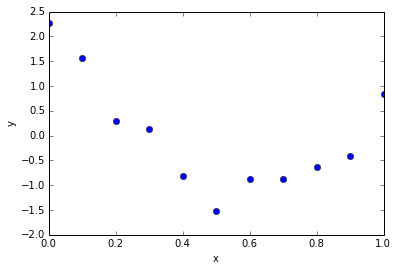

In [77]:
X,Y = getData(ifPlotData=True)


In [79]:
def LBFRegression(X,y,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)

### 2.1

In [80]:
xtrue = np.linspace(0,1,100) # 100 linearly spaced numbers
ytrue = np.cos(np.pi*xtrue)+1.5*np.cos(2*np.pi*xtrue) # computing the values of sin(x)/x
noise = np.random.normal(0,0.01,100)
ytrue = ytrue+noise


weights0 = LBFRegression(X,Y,0)[0]
m = 0
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue0 = np.inner(designMat,np.transpose(weights0))

weights1 = LBFRegression(X,Y,1)[0]
m = 1
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue1 = np.inner(designMat,np.transpose(weights1))



weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue3 = np.inner(designMat,np.transpose(weights3))



weights10 = LBFRegression(X,Y,10)[0]
m = 10
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]

weights10 = LBFRegression(X,Y,10)[0]
fValue10 = np.inner(designMat,np.transpose(weights10))

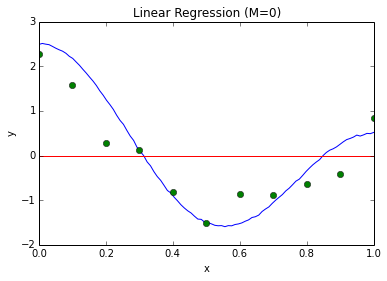

In [82]:
from pylab import savefig

plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=0)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis0.pdf')

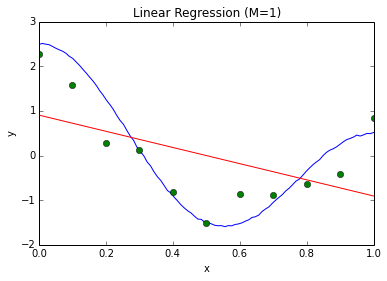

In [83]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=1)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis1.pdf')

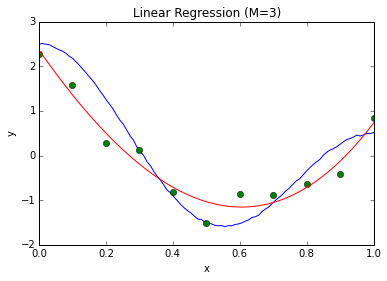

In [84]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=3)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis3.pdf')

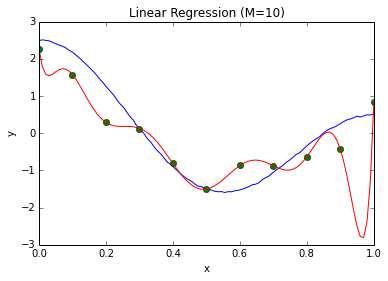

In [85]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=10)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis10.pdf')

# SSE

In [86]:
def SSEPolynomialBasis(weight,X,y):
    error = np.inner(X,np.transpose(weight)) - y
    SSE =np.inner(error,np.transpose(error))
    SSEderivative = 2*np.inner(np.transpose(X),error)
    return(SSE,SSEderivative)

In [87]:
# Plotting the SSE polynomial basis fnction


In [88]:
weights0 = LBFRegression(X,Y,0)[0]
print weights0
m = 0
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]
designMat
SSEPolynomialBasis(weights0,designMat,Y)
SSEPolynomialBasis(0.002,designMat,Y)
#type(weights0)
type(weights0)

[-0.00087273]


numpy.ndarray

In [89]:
SSEPolynomialBasis(weights0,designMat,Y)

(13.476960001818181, array([  1.77635684e-15]))

In [90]:
np.linalg.norm(SSEPolynomialBasis(weights0,designMat,Y)[1])

1.7763568394002505e-15

In [91]:
finiteDifference(SSEPolynomialBasis,weights0,0.02,designMat,Y)

[0.0]

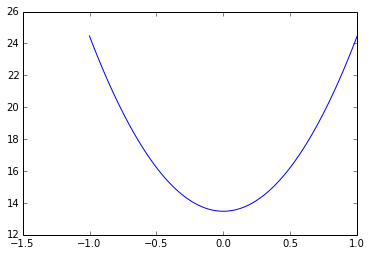

In [92]:
rangeOfValues = np.linspace(-1,1,100)
Value0 = []
for i in rangeOfValues:
    
    Value0.append(SSEPolynomialBasis(weights0+i,designMat,Y)[0]) 
#print Value0
#print rangeOfValues
SSEPolynomialBasis(weights0+0.001,designMat,Y)[1]
plt.plot(rangeOfValues+weights0,Value0)

In [93]:
# Compare bacth gradient descent for initial gues, steps and the convergence threshold

In [94]:
NGAnalyticSoln = weights0
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)

Iterations0 = [SP1output[1],SP2output[3],SP3output[3] ]

#SP3output
SP3output[1]
W1 = ['1','5','10']
Iterations0[1]
a = SP1output[1]
b = SP2output[1]
c = SP3output[1]
#SP1output

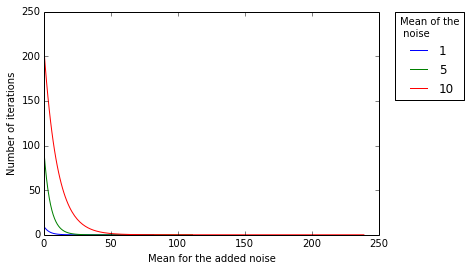

In [95]:
#plt.plot(W1,Iterations)
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [96]:
# Generate Plots for all these

In [97]:
# Comparing step sizes
NGAnalyticSoln = weights0
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20

step1Iter = []
step2Iter = []
step3Iter = []
step4Iter = []
#for i in range(10):
SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step2,1e-8,1000,designMat,Y)

SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step3,1e-8,1000,designMat,Y)
SP4output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step4,1e-8,1000,designMat,Y)
    

a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]

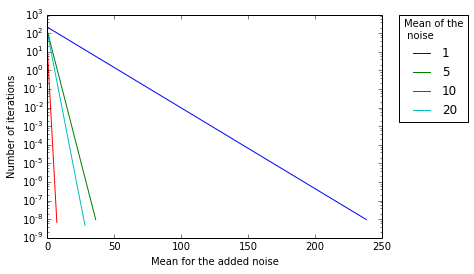

In [98]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='20')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
plt.yscale('log')
plt.show()

In [99]:
# Converegnce Threshold
a = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-2,1000,designMat,Y)[3]
b = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-4,1000,designMat,Y)[3]
c  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-6,1000,designMat,Y)[3]
d  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)[3]
iteration0 = [a,b,c,d]
W1 = ['1e-2','1e-4','1e-8','1e-10']

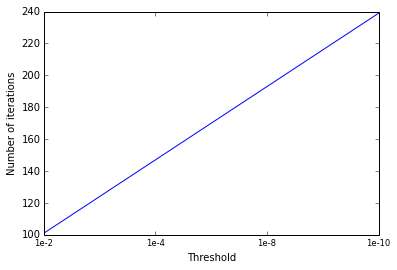

In [100]:
plt.plot(range(len(iteration0)),iteration0)


plt.xticks(range(len(W1)),W1, size='small')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Threshold')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [101]:
weights1 = LBFRegression(X,Y,1)[0]
m = 1
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]
print designMat,Y
SSEPolynomialBasis(weights1,designMat,Y)
#print weights1

[[ 1.   0. ]
 [ 1.   0.1]
 [ 1.   0.2]
 [ 1.   0.3]
 [ 1.   0.4]
 [ 1.   0.5]
 [ 1.   0.6]
 [ 1.   0.7]
 [ 1.   0.8]
 [ 1.   0.9]
 [ 1.   1. ]] [ 2.2748  1.5728  0.2885  0.1237 -0.81   -1.5123 -0.8655 -0.8766 -0.6274
 -0.4159  0.8383]


(9.8619830089999994, array([  0.00000000e+00,   4.44089210e-16]))

In [102]:
np.linalg.norm(SSEPolynomialBasis(weights1,designMat,Y)[1])

4.4408920985006262e-16

In [103]:
finiteDifference(SSEPolynomialBasis,weights1,0.02,designMat,Y)

[0.0, 0.0]

In [104]:
Sp = [10,10]
step = 1/np.linalg.norm(SSEPolynomialBasis(Sp,designMat,Y)[1])
print step
#batchGradientDiscent(SSEPolynomialBasis,Sp,step,1e-8,1000,designMat,Y)

0.0026225784646


In [105]:
NGAnalyticSoln = weights1
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
W1 = ['1','5','10']
Iterations0[1]
a = SP1output[1]
b = SP2output[1]
c = SP3output[1]

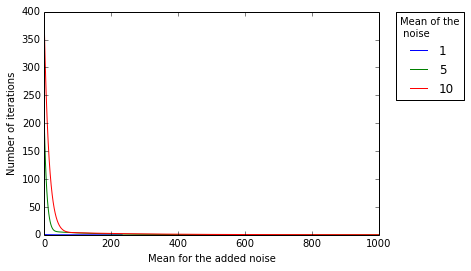

In [106]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [107]:
NGAnalyticSoln = weights1
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20

step1Iter = []
step2Iter = []
step3Iter = []
step4Iter = []
#for i in range(10):
SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step2,1e-8,1000,designMat,Y)

SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step3,1e-8,1000,designMat,Y)
SP4output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step4,1e-8,1000,designMat,Y)
    

a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]

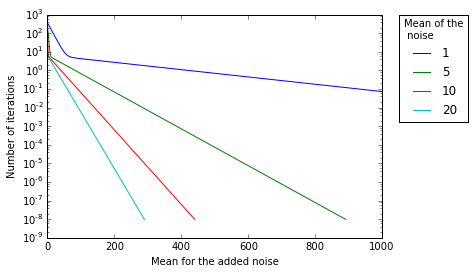

In [108]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='20')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
plt.yscale('log')
plt.show()

In [109]:
# Converegnce Threshold
a = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-2,2000,designMat,Y)[3]
b = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-4,2000,designMat,Y)[3]
c  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-6,2000,designMat,Y)[3]
d  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,2000,designMat,Y)[3]
iteration0 = [a,b,c,d]
W1 = ['1e-2','1e-4','1e-8','1e-10']
c

2000

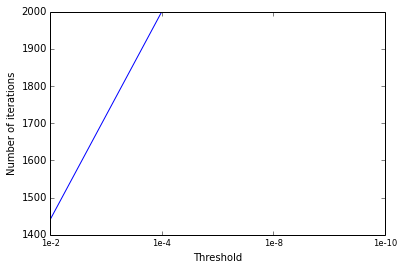

In [110]:
plt.plot(range(len(iteration0)),iteration0)

plt.xticks(range(len(W1)),W1, size='small')

plt.xlabel('Threshold')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [111]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights1,0.02,designMat,Y))

0.0

In [112]:
weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]

SSEPolynomialBasis(weights3,designMat,Y)

(0.65484574996503375,
 array([  2.72337708e-13,   1.61315405e-13,   1.19598775e-13,
          1.04971587e-13]))

In [113]:
np.linalg.norm(SSEPolynomialBasis(weights3,designMat,Y)[1])

3.5427868739665491e-13

In [114]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights3,0.02,designMat,Y))

3.1646225226420966e-13

In [115]:
finiteDifference(SSEPolynomialBasis,weights3,0.02,designMat,Y)

[2.6645352591003757e-13,
 1.1657341758564144e-13,
 1.0547118733938987e-13,
 6.6613381477509392e-14]

In [116]:
NGAnalyticSoln = weights3
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,20000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,20000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,20000,designMat,Y)
W1 = ['1','5','10']
Iterations0[1]
a = SP1output[1]
b = SP2output[1]
c = SP3output[1]

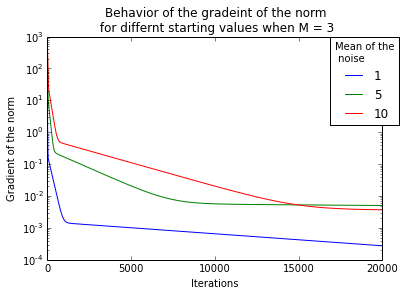

In [117]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Gradient of the norm')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.,title = "Mean of the \n noise")
plt.title('Behavior of the gradeint of the norm \n for differnt starting values when M = 3')
#plt.show()
pl.savefig('../ImageFiles/HW1/BatchGradientDiscent_InitialGuess3.3.pdf')

In [118]:
NGAnalyticSoln = weights3
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20

step1Iter = []
step2Iter = []
step3Iter = []
step4Iter = []
#for i in range(10):
SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,2000,designMat,Y)
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step2,1e-8,2000,designMat,Y)

SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step3,1e-8,2000,designMat,Y)
SP4output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step4,1e-8,2000,designMat,Y)
    
SP5output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step5,1e-8,1000,designMat,Y)

a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]
e =  SP5output[1]

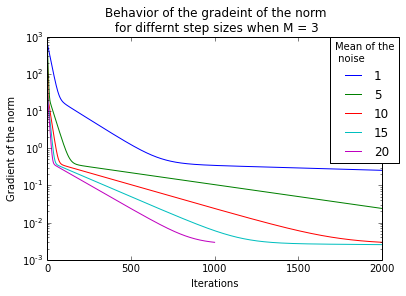

In [119]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='15')
plt.plot(range(len(e)),e,label='20')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Step factor")
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Gradient of the norm')
plt.yscale('log')

plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.,title = "Mean of the \n noise")
plt.title('Behavior of the gradeint of the norm \n for differnt step sizes when M = 3')
#plt.show()
pl.savefig('../ImageFiles/HW1/BatchGradientDiscent_Stepsize_3.3.pdf')

In [120]:
# Converegnce Threshold
a = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-2,2000,designMat,Y)[3]
b = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-4,2000,designMat,Y)[3]
c  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-6,2000,designMat,Y)[3]
d  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,2000,designMat,Y)[3]
iteration0 = [a,b,c,d]
W1 = ['1e-2','1e-4','1e-8','1e-10']
c

2000

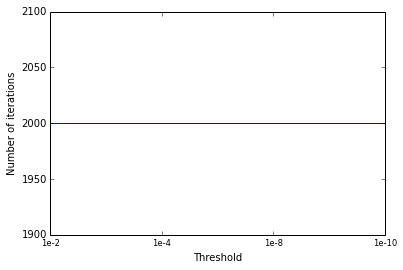

In [121]:
plt.plot(range(len(iteration0)),iteration0)

plt.xticks(range(len(W1)),W1, size='small')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Threshold')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [122]:
weights10 = LBFRegression(X,Y,10)[0]
m = 10
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]


SSEPolynomialBasis(weights10,designMat,Y)

(0.0011636150697689452,
 array([-0.04220659, -0.07631585, -0.0785371 , -0.07655327, -0.07378075,
        -0.07106037, -0.06860579, -0.06645134, -0.06457771, -0.06295159,
        -0.0615389 ]))

In [123]:
NGAnalyticSoln = weights10
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
W1 = ['1','5','10']
Iterations0[1]
a = SP1output[1]
b = SP2output[1]
c = SP3output[1]

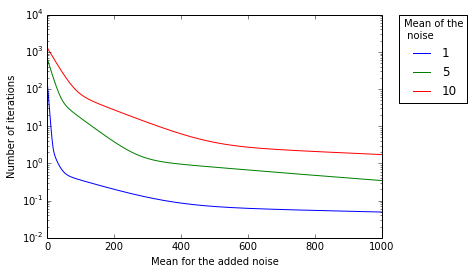

In [124]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
plt.yscale('log')
plt.show()

In [125]:
NGAnalyticSoln = weights10
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
step1 = step
step2 = step*5
step3 = step*10
step4 = step*15
step5 = step*20

step1Iter = []
step2Iter = []
step3Iter = []
step4Iter = []
#for i in range(10):
SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step2,1e-8,1000,designMat,Y)

SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step3,1e-8,1000,designMat,Y)
SP4output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step4,1e-8,1000,designMat,Y)

a =  SP1output[1]
b =  SP2output[1]
c =  SP3output[1]
d =  SP4output[1]

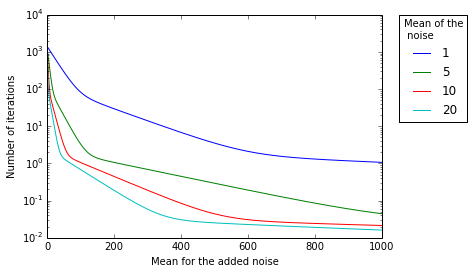

In [126]:
plt.plot(range(len(a)),a,label='1')
plt.plot(range(len(b)),b,label='5')
plt.plot(range(len(c)),c,label='10')
plt.plot(range(len(d)),d,label='20')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Mean for the added noise')
plt.ylabel('Number of iterations')
plt.yscale('log')
plt.show()

In [127]:
# Converegnce Threshold
a = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-2,30000,designMat,Y)[3]
b = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-4,30000,designMat,Y)[3]
c  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-6,30000,designMat,Y)[3]
d  = batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,200000,designMat,Y)[3]
iteration0 = [a,b,c,d]
W1 = ['1e-2','1e-4','1e-8','1e-10']
d
#batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,200000,designMat,Y)

200000

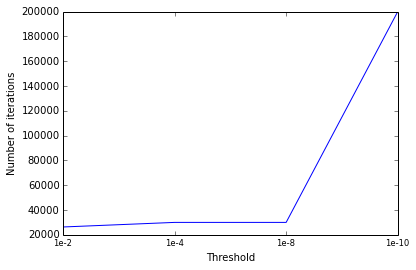

In [128]:
plt.plot(range(len(iteration0)),iteration0)

plt.xticks(range(len(W1)),W1, size='small')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('Threshold')
plt.ylabel('Number of iterations')
#plt.yscale('log')
plt.show()

In [129]:
np.linalg.norm(SSEPolynomialBasis(weights10,designMat,Y)[1])

0.22620768249878792

In [130]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights10,0.5,designMat,Y))

0.22620768254986937

In [133]:
NGAnalyticSoln = weights10
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))
step = 1/np.linalg.norm(SSEPolynomialBasis(SP1,designMat,Y)[1])

SP1output =  batchGradientDiscent(SSEPolynomialBasis,SP1,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP2,designMat,Y)[1])
SP2output =  batchGradientDiscent(SSEPolynomialBasis,SP2,step,1e-8,1000,designMat,Y)
step = 1/np.linalg.norm(SSEPolynomialBasis(SP3,designMat,Y)[1])
SP3output =  batchGradientDiscent(SSEPolynomialBasis,SP3,step,1e-8,1000,designMat,Y)

In [136]:
weight3high = weights3+0.2
weight3Low = weights3-0.2
#a = SSEPolynomialBasis(weight3high,designMat,ytrue)[0]
#b = SSEPolynomialBasis(weight3Low,designMat,ytrue)[0]
print a,b

26303 30000


Numerical derviative for the SSE

In [137]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights10,0.5,designMat,Y))

0.22620768254986934

# 2.3 Cosine basis function

In [139]:
def CosBFRegression(X,y,m):
    designMat = np.zeros((len(X),m))
    for i in range(1,m+1):
        
        #print np.cos(i*np.pi*X)
        designMat[:,i-1] = np.cos(i*np.pi*X)
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle)

In [140]:
Y

array([ 2.2748,  1.5728,  0.2885,  0.1237, -0.81  , -1.5123, -0.8655,
       -0.8766, -0.6274, -0.4159,  0.8383])

In [141]:
cosBasis1 = np.append(CosBFRegression(X,Y,1),[0]*7)
cosBasis2 = np.append(CosBFRegression(X,Y,2),[0]*6)
cosBasis3 = np.append(CosBFRegression(X,Y,3),[0]*5)
cosBasis4 = np.append(CosBFRegression(X,Y,4),[0]*4)
cosBasis5 = np.append(CosBFRegression(X,Y,5),[0]*3)
cosBasis6 = np.append(CosBFRegression(X,Y,6),[0]*2)
cosBasis7 = np.append(CosBFRegression(X,Y,7),[0]*1)
cosBasis8 = np.append(CosBFRegression(X,Y,8),[0]*0)

In [142]:
TrueCosBasis = np.array([1,1.5,0,0,0,0,0,0])
def euclideanDistanceTrueCos(Vector):
    return np.linalg.norm(TrueCosBasis - Vector)
    
EuclideanDistance = [euclideanDistanceTrueCos(cosBasis1),euclideanDistanceTrueCos(cosBasis2),euclideanDistanceTrueCos(cosBasis3),euclideanDistanceTrueCos(cosBasis4),
                    euclideanDistanceTrueCos(cosBasis5),euclideanDistanceTrueCos(cosBasis6),euclideanDistanceTrueCos(cosBasis7),euclideanDistanceTrueCos(cosBasis8)]
EuclideanDistance 
MVector = range(1,9)
MVector

[1, 2, 3, 4, 5, 6, 7, 8]

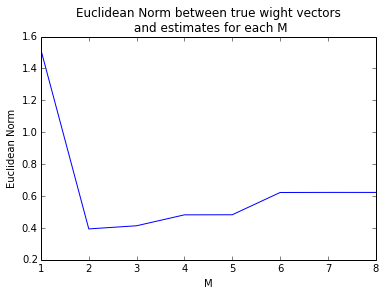

In [143]:
plt.plot(MVector,EuclideanDistance)

plt.xlabel('M')
plt.ylabel('Euclidean Norm')
plt.title('Euclidean Norm between true wight vectors\n and estimates for each M')

#plt.show()
pl.savefig('../ImageFiles/HW1/CosBasisDifference.pdf')

In [144]:
np.cos(4*np.pi*X)

array([ 1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699,
        1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699,  1.        ])

# Ridge Regression 

In [145]:
# Data for question 3

import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def regressAData():
    return getData('../DataFiles/HW1/regressA_train.txt')

def regressBData():
    return getData('../DataFiles/HW1/regressB_train.txt')

def validateData():
    return getData('../DataFiles/HW1/regress_validate.txt')

In [146]:
def ridgeRegression(X,y,lambdaShrink,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
        
    y = y.ravel() 
    
    yCentered = [j - np.mean(y) for j in y] # Centering y's
    
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m+1)),np.transpose(designMat)),yCentered)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

Ridge regression fit for M = 1 for various lamdas

In [147]:
RRLambda0_1M1 = ridgeRegression(X,Y,0.1,1)[0]
RRLambda0_5M1 = ridgeRegression(X,Y,0.5,1)[0]
RRLambda1M1 = ridgeRegression(X,Y,1,1)[0]
RRLambda2M1 = ridgeRegression(X,Y,2,1)[0]
RRLambda5M1 = ridgeRegression(X,Y,5,1)[0]
W1 = ['w0','w1']
RRLambda2M1

array([ 0.23968251, -0.56587693])

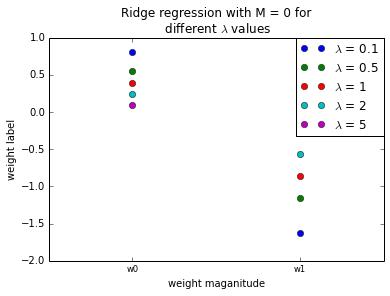

In [148]:
#plt.bar(range(len(t12)), t12, align='center')
#plt.xticks(range(len(t12)), t11, size='small')
#plt.show()
plt.plot(range(len(RRLambda0_1M1)),RRLambda0_1M1,'o',label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M1)),RRLambda0_5M1,'o',label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M1)),RRLambda1M1,'o',label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M1)),RRLambda2M1,'o',label='$\lambda$ = 2')
plt.plot(range(len(RRLambda5M1)),RRLambda5M1,'o',label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.xlabel("weight maganitude")
plt.ylabel("weight label")
pl.xlim([-0.5,1.5])
plt.title("Ridge regression with M = 0 for \n different $\lambda$ values")
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)

#plt.show()
pl.savefig('../ImageFiles/HW1/RidgeRegression_M=03.1.pdf')

Ridge regression fit for M = 3 for various lamdas

In [149]:
RRLambda0_1M3 = ridgeRegression(X,Y,0.1,3)[0]
RRLambda0_5M3 = ridgeRegression(X,Y,0.5,3)[0]
RRLambda1M3 = ridgeRegression(X,Y,1,3)[0]
RRLambda2M3 = ridgeRegression(X,Y,2,3)[0]
RRLambda5M3 = ridgeRegression(X,Y,5,3)[0]
W1 = ['w0','w1','w2','w3']
RRLambda2M1

array([ 0.23968251, -0.56587693])

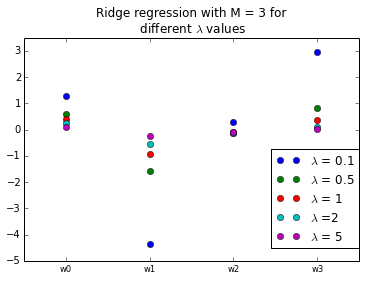

In [150]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M3)),RRLambda0_1M3,'o',label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M3)),RRLambda0_5M3,'o',label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M3)),RRLambda1M3,'o',label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M3)),RRLambda2M3,'o',label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M3)),RRLambda5M3,'o',label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
pl.xlim([-0.5,3.5])
pl.ylim([-5,3.5])
plt.legend(bbox_to_anchor=(1, 0.5), loc=1, borderaxespad=0.)
plt.title("Ridge regression with M = 3 for \n different $\lambda$ values")
pl.savefig('../ImageFiles/HW1/RidgeRegression_M=3_3.1.pdf')

Ridge regression fit for M = 5 for various lamdas

In [151]:
RRLambda0_1M5 = ridgeRegression(X,Y,0.1,5)[0]
RRLambda0_5M5 = ridgeRegression(X,Y,0.5,5)[0]
RRLambda1M5 = ridgeRegression(X,Y,1,5)[0]
RRLambda2M5 = ridgeRegression(X,Y,2,5)[0]
RRLambda5M5 = ridgeRegression(X,Y,5,5)[0]
W1 = ['w0','w1','w2','w3','w4','w5']
RRLambda2M1

array([ 0.23968251, -0.56587693])

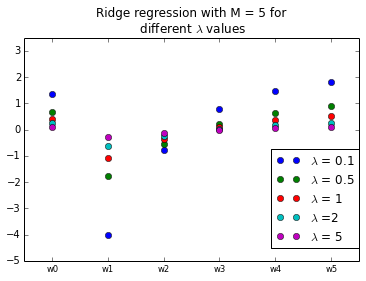

In [152]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M5)),RRLambda0_1M5,'o',label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M5)),RRLambda0_5M5,'o',label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M5)),RRLambda1M5,'o',label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M5)),RRLambda2M5,'o',label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M5)),RRLambda5M5,'o',label='$\lambda$ = 5')
pl.xlim([-0.5,5.5])
pl.ylim([-5,3.5])
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1, 0.5), loc=1, borderaxespad=0.)
plt.title("Ridge regression with M = 5 for \n different $\lambda$ values")
pl.savefig('../ImageFiles/HW1/RidgeRegression_M=5_3.1.pdf')

Ridge regression fit for M = 10 for various lamdas

In [153]:
RRLambda0_1M10 = ridgeRegression(X,Y,0.1,10)[0]
RRLambda0_5M10 = ridgeRegression(X,Y,0.5,10)[0]
RRLambda1M10 = ridgeRegression(X,Y,1,10)[0]
RRLambda2M10 = ridgeRegression(X,Y,2,10)[0]
RRLambda5M10 = ridgeRegression(X,Y,5,10)[0]
W1 = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9','w10']
RRLambda2M1

array([ 0.23968251, -0.56587693])

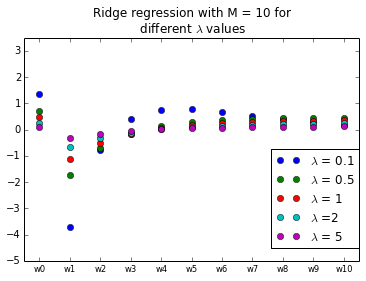

In [154]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M10)),RRLambda0_1M10,'o',label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,'o',label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M10)),RRLambda1M10,'o',label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M10)),RRLambda2M10,'o',label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M10)),RRLambda5M10,'o',label='$\lambda$ = 5')
pl.xlim([-0.5,10.5])
pl.ylim([-5,3.5])
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1, 0.5), loc=1, borderaxespad=0.)
plt.title("Ridge regression with M = 10 for \n different $\lambda$ values")
pl.savefig('../ImageFiles/HW1/RidgeRegression_M=10_3.1.pdf')

Test 1 (Trained from dataset A and testes in dataset B)

In [155]:
Train1_X = regressAData()[0]
Train1_Y = regressAData()[1]
Test1_X = regressBData()[0]
Test1_Y = regressBData()[1]
valid1_X =validateData()[0]
valid1_Y = validateData()[1]

In [156]:
def LBFRidgeRegression(theta,X,y,lambda_shrinkage):
    params = len(theta)
    #print (m)
    designMat = np.zeros((len(X),params))
    for i in range(params):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        #designMatTemp[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
    
    y = y.ravel() 
    yCentered = [j - np.mean(y) for j in y]  # Centering y's
    
    
    fittedValues = np.dot(designMat,np.transpose(theta))
    fittedDifference = [a - b for a, b in zip(fittedValues,yCentered)]
    RSS = sum(a**2 for a in fittedDifference)+lambda_shrinkage*np.dot(theta,np.transpose(theta))
    return(fittedValues,RSS)

In [157]:
# Lambdas to be tested are 0.1,0.5,1,2,3,5 and the M's are 1,3,5,10
ridgeParam = ridgeRegression(valid1_X,valid1_Y,0.6,1)[0]

#ridgeParam

In [158]:
LBFRidgeRegression(ridgeParam,valid1_X,valid1_Y,1)[1]

14.386760182846109

M =  1

In [159]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [160]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


In [161]:
errorLambda0_1M1_Test = LBFRidgeRegression(ridgeParamLambda0_1M1,Test1_X ,Test1_Y,0.1)[1]
errorLambda0_5M1_Test = LBFRidgeRegression(ridgeParamLambda0_5M1,Test1_X ,Test1_Y,0.5)[1]
errorLambda1M1_Test = LBFRidgeRegression(ridgeParamLambda1M1,Test1_X ,Test1_Y,1)[1]
errorLambda2M1_Test = LBFRidgeRegression(ridgeParamLambda2M1,Test1_X ,Test1_Y,2)[1]
errorLambda5M1_Test = LBFRidgeRegression(ridgeParamLambda5M1,Test1_X ,Test1_Y,5)[1]

M = 3

In [162]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [163]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

In [164]:
errorLambda0_1M3_Test = LBFRidgeRegression(ridgeParamLambda0_1M3,Test1_X ,Test1_Y,0.1)[1]
errorLambda0_5M3_Test = LBFRidgeRegression(ridgeParamLambda0_5M3,Test1_X ,Test1_Y,0.5)[1]
errorLambda1M3_Test = LBFRidgeRegression(ridgeParamLambda1M3,Test1_X ,Test1_Y,1)[1]
errorLambda2M3_Test = LBFRidgeRegression(ridgeParamLambda2M3,Test1_X ,Test1_Y,2)[1]
errorLambda5M3_Test = LBFRidgeRegression(ridgeParamLambda5M3,Test1_X ,Test1_Y,5)[1]

M = 5

In [165]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [166]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

In [167]:
errorLambda0_1M5_Test = LBFRidgeRegression(ridgeParamLambda0_1M5,Test1_X ,Test1_Y,0.1)[1]
errorLambda0_5M5_Test = LBFRidgeRegression(ridgeParamLambda0_5M5,Test1_X ,Test1_Y,0.5)[1]
errorLambda1M5_Test = LBFRidgeRegression(ridgeParamLambda1M5,Test1_X ,Test1_Y,1)[1]
errorLambda2M5_Test = LBFRidgeRegression(ridgeParamLambda2M5,Test1_X ,Test1_Y,2)[1]
errorLambda5M5_Test = LBFRidgeRegression(ridgeParamLambda5M5,Test1_X ,Test1_Y,5)[1]

M = 10

In [168]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [169]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [170]:
errorLambda0_1M10_Test = LBFRidgeRegression(ridgeParamLambda0_1M10,Test1_X ,Test1_Y,0.1)[1]
errorLambda0_5M10_Test = LBFRidgeRegression(ridgeParamLambda0_5M10,Test1_X ,Test1_Y,0.5)[1]
errorLambda1M10_Test = LBFRidgeRegression(ridgeParamLambda1M10,Test1_X ,Test1_Y,1)[1]
errorLambda2M10_Test = LBFRidgeRegression(ridgeParamLambda2M10,Test1_X ,Test1_Y,2)[1]
errorLambda5M10_Test = LBFRidgeRegression(ridgeParamLambda5M10,Test1_X ,Test1_Y,5)[1]

In [171]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

errorM1_Test = [errorLambda0_1M1_Test,errorLambda0_5M1_Test,errorLambda1M1_Test,errorLambda2M1_Test,errorLambda5M1_Test]
errorM3_Test = [errorLambda0_1M3_Test,errorLambda0_5M3_Test,errorLambda1M3_Test,errorLambda2M3_Test,errorLambda5M3_Test]
errorM5_Test = [errorLambda0_1M5_Test,errorLambda0_5M5_Test,errorLambda1M5_Test,errorLambda2M5_Test,errorLambda5M5_Test]
errorM10_Test = [errorLambda0_1M10_Test,errorLambda0_5M10_Test,errorLambda1M10_Test,errorLambda2M10_Test,errorLambda5M10_Test]

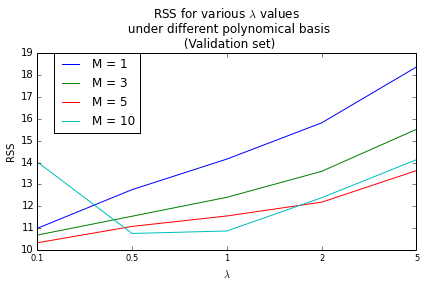

In [172]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
plt.plot(range(len(errorM10)),errorM10,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('RSS')
plt.title('RSS for various $\lambda$ values \n under different polynomical basis \n (Validation set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(0.27, 1), loc=1, borderaxespad=0.)
plt.tight_layout()
pl.savefig('../ImageFiles/HW1/RSSValidationRR3.2_Train_A.pdf')
plt.show()

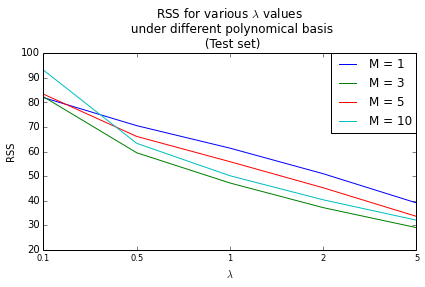

In [173]:
# Adding label to the plot
plt.plot(range(len(errorM1_Test)),errorM1_Test,label='M = 1')
plt.plot(range(len(errorM3_Test)),errorM3_Test,label='M = 3')
plt.plot(range(len(errorM5_Test)),errorM5_Test,label='M = 5')
plt.plot(range(len(errorM10_Test)),errorM10_Test,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('RSS')
plt.title('RSS for various $\lambda$ values \n under different polynomical basis \n (Test set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.tight_layout()
pl.savefig('../ImageFiles/HW1/RSSTestRR3.2_Train_A.pdf')
plt.show()

In [174]:
# Testing Using the Model with M = 5 and lambda = 0.5 since it gave the smallets validation error

In [175]:
ridgeRegression(Test1_X,Test1_Y,0.1,5)

(array([-0.25867841, -0.78264404, -1.46837459,  2.39259046,  0.04465407,
        -0.41279016]),
 array([ 0.1904636 ,  0.62048198,  0.89327017, -2.07510977,  0.01224547,
         0.87423978, -2.45998271,  1.50936929,  0.12020269,  0.27225587]))

# Test 2

In [176]:
Train1_X = regressBData()[0]
Train1_Y = regressBData()[1]
Test1_X = regressAData()[0]
Test1_Y = regressAData()[1]

M =  1

In [177]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [178]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


In [179]:
errorLambda0_1M1_Test = LBFRidgeRegression(ridgeParamLambda0_1M1,Test1_X ,Test1_Y,0.1)[1]
errorLambda0_5M1_Test = LBFRidgeRegression(ridgeParamLambda0_5M1,Test1_X ,Test1_Y,0.5)[1]
errorLambda1M1_Test = LBFRidgeRegression(ridgeParamLambda1M1,Test1_X ,Test1_Y,1)[1]
errorLambda2M1_Test = LBFRidgeRegression(ridgeParamLambda2M1,Test1_X ,Test1_Y,2)[1]
errorLambda5M1_Test = LBFRidgeRegression(ridgeParamLambda5M1,Test1_X ,Test1_Y,5)[1]

M = 3

In [180]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [181]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

In [182]:
errorLambda0_1M3_Test = LBFRidgeRegression(ridgeParamLambda0_1M3,Test1_X ,Test1_Y,0.1)[1]
errorLambda0_5M3_Test = LBFRidgeRegression(ridgeParamLambda0_5M3,Test1_X ,Test1_Y,0.5)[1]
errorLambda1M3_Test = LBFRidgeRegression(ridgeParamLambda1M3,Test1_X ,Test1_Y,1)[1]
errorLambda2M3_Test = LBFRidgeRegression(ridgeParamLambda2M3,Test1_X ,Test1_Y,2)[1]
errorLambda5M3_Test = LBFRidgeRegression(ridgeParamLambda5M3,Test1_X ,Test1_Y,5)[1]

M = 5

In [183]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [184]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

In [185]:
errorLambda0_1M5_Test = LBFRidgeRegression(ridgeParamLambda0_1M5,Test1_X ,Test1_Y,0.1)[1]
errorLambda0_5M5_Test = LBFRidgeRegression(ridgeParamLambda0_5M5,Test1_X ,Test1_Y,0.5)[1]
errorLambda1M5_Test = LBFRidgeRegression(ridgeParamLambda1M5,Test1_X ,Test1_Y,1)[1]
errorLambda2M5_Test = LBFRidgeRegression(ridgeParamLambda2M5,Test1_X ,Test1_Y,2)[1]
errorLambda5M5_Test = LBFRidgeRegression(ridgeParamLambda5M5,Test1_X ,Test1_Y,5)[1]

M = 10

In [186]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [187]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [188]:
errorLambda0_1M10_Test = LBFRidgeRegression(ridgeParamLambda0_1M10,Test1_X ,Test1_Y,0.1)[1]
errorLambda0_5M10_Test = LBFRidgeRegression(ridgeParamLambda0_5M10,Test1_X ,Test1_Y,0.5)[1]
errorLambda1M10_Test = LBFRidgeRegression(ridgeParamLambda1M10,Test1_X ,Test1_Y,1)[1]
errorLambda2M10_Test = LBFRidgeRegression(ridgeParamLambda2M10,Test1_X ,Test1_Y,2)[1]
errorLambda5M10_Test = LBFRidgeRegression(ridgeParamLambda5M10,Test1_X ,Test1_Y,5)[1]

In [189]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

errorM1_Test = [errorLambda0_1M1_Test,errorLambda0_5M1_Test,errorLambda1M1_Test,errorLambda2M1_Test,errorLambda5M1_Test]
errorM3_Test = [errorLambda0_1M3_Test,errorLambda0_5M3_Test,errorLambda1M3_Test,errorLambda2M3_Test,errorLambda5M3_Test]
errorM5_Test = [errorLambda0_1M5_Test,errorLambda0_5M5_Test,errorLambda1M5_Test,errorLambda2M5_Test,errorLambda5M5_Test]
errorM10_Test = [errorLambda0_1M10_Test,errorLambda0_5M10_Test,errorLambda1M10_Test,errorLambda2M10_Test,errorLambda5M10_Test]

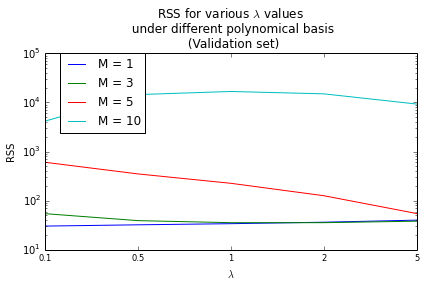

In [190]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
plt.plot(range(len(errorM10)),errorM10,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('RSS')
plt.yscale('log')
plt.title('RSS for various $\lambda$ values \n under different polynomical basis \n (Validation set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(0.27, 1), loc=1, borderaxespad=0.)
plt.tight_layout()
pl.savefig('../ImageFiles/HW1/RSSValidationRR3.2_Tarin_B.pdf')
plt.show()

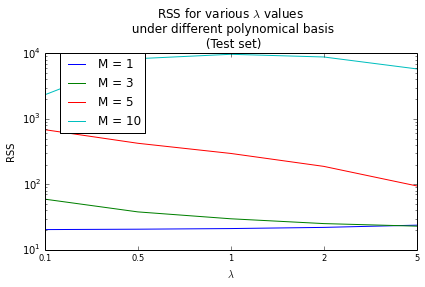

In [191]:
plt.plot(range(len(errorM1_Test)),errorM1_Test,label='M = 1')
plt.plot(range(len(errorM3_Test)),errorM3_Test,label='M = 3')
plt.plot(range(len(errorM5_Test)),errorM5_Test,label='M = 5')
plt.plot(range(len(errorM10_Test)),errorM10_Test,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('RSS')
plt.title('RSS for various $\lambda$ values \n under different polynomical basis \n (Test set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(0.27, 1), loc=1, borderaxespad=0.)
plt.yscale('log')
plt.tight_layout()
pl.savefig('../ImageFiles/HW1/RSSTestRR3.2_Train_B.pdf')
plt.show()

In [192]:
#In this case model with M = 1 with lambda = 0.1 gave the smallest validation error

In [193]:
ridgeRegression(Test1_X,Test1_Y,0.1,1)

(array([ 1.83306641,  0.8975539 ]),
 array([ 1.43213215, -0.45771566,  0.94519853, -2.09289515, -1.0858328 ,
        -2.27995731, -2.17895166,  1.28736793, -0.84532812, -0.99719329,
         2.42633417,  2.33657878,  1.08000331]))

# Question 4 (Sparsity and LASSO)

In [194]:
# Data for this question
import pdb
import random
import pylab as pl
import numpy as np

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def lassoTrainData():
    return getData('../DataFiles/HW1/lasso_train.txt')

def lassoValData():
    return getData('../DataFiles/HW1/lasso_validate.txt')

def lassoTestData():
    return getData('../DataFiles/HW1/lasso_test.txt')


In [195]:
from sklearn import linear_model

clf0_1 = linear_model.Lasso(alpha=0.1,fit_intercept=False) # alpha is the shrinkage parameter
clf0_5 = linear_model.Lasso(alpha=0.5,fit_intercept=False)
clf1 = linear_model.Lasso(alpha=1,fit_intercept=False)
clf2 = linear_model.Lasso(alpha=2,fit_intercept=False)
clf5 = linear_model.Lasso(alpha=5,fit_intercept=False)

In [196]:
def sineBasisFunction(X,y,n=13):
    designMat = np.zeros((len(X),n))
    designMat[:,0] = X.ravel()
    for i in range(1,n):
        #print([a**i for a in X])
        designMat[:,i] = [np.sin(0.4*np.pi*a*i) for a in X]
    return(designMat,y)

In [197]:
X = lassoTrainData()[0]
y = lassoTrainData()[1]

In [198]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [199]:
clf0_1.fit(designMat, outcome)
lambda0_1coeff = clf0_1.coef_
lambda0_1coeff

array([ 0.        ,  0.        ,  5.49526681,  0.33802335,  0.        ,
        1.12455954,  2.28295397,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [200]:
clf0_5.fit(designMat, outcome)
lambda0_5coeff = clf0_5.coef_
lambda0_5coeff

array([ 0.        ,  0.        ,  4.56610215,  0.76841601,  0.        ,
        0.        ,  2.41591679,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [201]:
clf1.fit(designMat, outcome)
lambda1coeff = clf1.coef_
lambda1coeff

array([ 0.        ,  0.        ,  4.25260727,  0.02250036,  0.        ,
        0.        ,  1.63404412,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [202]:
clf2.fit(designMat, outcome)
lambda2coeff =clf2.coef_
lambda2coeff

array([ 0.        ,  0.        ,  2.56819399,  0.        ,  0.        ,
        0.        ,  0.1812299 ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ])

In [203]:
clf5.fit(designMat, outcome)
lambda5coeff =clf5.coef_
lambda5coeff

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])

## Using ridge regression on the same data

In [204]:
def ridgeRegressionGeneral(X,y,lambdaShrink):
    designMat = X
    m = X.shape[1]
    y = y.ravel() 
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

In [205]:
ridgeCoeff0_1 = ridgeRegressionGeneral(designMat,y,0.1)[0]

In [206]:
ridgeCoeff0_5 = ridgeRegressionGeneral(designMat,y,0.5)[0]

In [207]:
ridgeCoeff1 = ridgeRegressionGeneral(designMat,y,1)[0]

In [208]:
ridgeCoeff2 = ridgeRegressionGeneral(designMat,y,2)[0]

In [209]:
ridgeCoeff5 = ridgeRegressionGeneral(designMat,y,5)[0]

# Validation

In [210]:
X = lassoValData()[0]
y = lassoValData()[1]

In [211]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]


In [212]:
error = [a - b for a,b in zip(np.dot(designMat,lambda0_1coeff),y)]
SSELassos0_1 = sum([a**2 for a in error])
print SSELassos0_1
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff0_1),y)]
SSERidge0_1 = sum([a**2 for a in error])
print SSERidge0_1

[ 1.16429323]
[ 0.52224939]


In [213]:
error = [a - b for a,b in zip(np.dot(designMat,lambda0_5coeff),y)]
SSELassos0_5 = sum([a**2 for a in error])
print SSELassos0_5
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff0_5),y)]
SSERidge0_5 = sum([a**2 for a in error])
print SSERidge0_5

[ 8.18185929]
[ 1.5720065]


In [214]:
error = [a - b for a,b in zip(np.dot(designMat,lambda1coeff),y)]
SSELassos1 = sum([a**2 for a in error])
print SSELassos1
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff1),y)]
SSERidge1 = sum([a**2 for a in error])
print SSERidge1

[ 25.4071393]
[ 4.03325155]


In [215]:
error = [a - b for a,b in zip(np.dot(designMat,lambda2coeff),y)]
SSELassos2 = sum([a**2 for a in error])
print SSELassos2
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff2),y)]
SSERidge2 = sum([a**2 for a in error])
print SSERidge2

[ 83.28028138]
[ 10.84256721]


In [216]:
error = [a - b for a,b in zip(np.dot(designMat,lambda5coeff),y)]
SSELassos5 = sum([a**2 for a in error])
print SSELassos5
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff5),y)]
SSERidge5 = sum([a**2 for a in error])
print SSERidge5

[ 218.05906373]
[ 34.73147143]


# Test

In [217]:
X = lassoTestData()[0]
y = lassoTestData()[1]

In [218]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [219]:
clf0_1.fit(designMat, outcome)

Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [220]:
LASSo_weights = clf0_1.coef_

In [221]:
ridgeWeights = ridgeRegressionGeneral(designMat,y,0.1)[0]

Plotting th true weights in a plot

In [222]:
trueWeights = pl.loadtxt('../DataFiles/HW1/lasso_true_w.txt')

In [223]:
trueWeights

array([ 0.    ,  0.    ,  5.6463,  0.7786,  0.    ,  0.8109,  2.6827,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])

Plotting the true weights

/Users/Divy/anaconda/lib/python2.7/site-packages/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


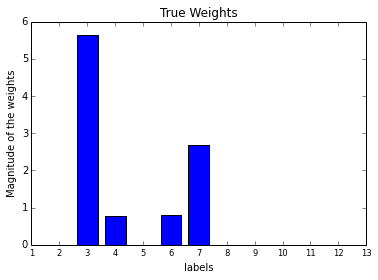

In [224]:
import matplotlib.pyplot as plt
#import plotly.plotly as py

N = len(trueWeights)
x = range(1,N+1)
width = 0.75
W1 = [str(a) for a in x]
plt.bar(range(len(trueWeights)),trueWeights, width, color="blue",align='center')

plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('labels')
plt.ylabel('Magnitude of the weights')
plt.title('True Weights')
#plt.yscale('log')
#plt.show()
pl.savefig('../ImageFiles/HW1/TrueWeights_Question4.pdf')


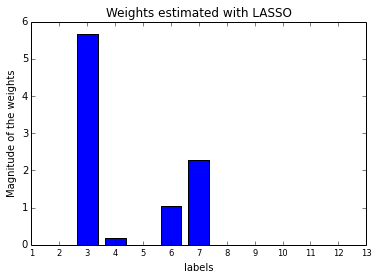

In [225]:


N = len(LASSo_weights)
x = range(1,N+1)
width = 0.75
W1 = [str(a) for a in x]
plt.bar(range(len(LASSo_weights)),LASSo_weights, width, color="blue",align='center')

plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('labels')
plt.ylabel('Magnitude of the weights')
plt.title('Weights estimated with LASSO')
#plt.yscale('log')
#plt.show()
pl.savefig('../ImageFiles/HW1/LASSO_Question4.pdf')


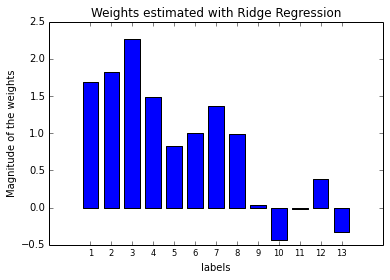

In [226]:
# Plot the weights from the ridge regression
N = len(ridgeWeights)
x = range(1,N+1)
width = 0.75
W1 = [str(a) for a in x]
plt.bar(range(len(ridgeWeights)),ridgeWeights, width, color="blue",align='center')

plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('labels')
plt.ylabel('Magnitude of the weights')
plt.title('Weights estimated with Ridge Regression')
#plt.yscale('log')
#plt.show()
pl.savefig('../ImageFiles/HW1/Ridge_Question4.pdf')


# Estimates with Lambda = 0

In [230]:
clf0 = linear_model.Lasso(alpha=0,fit_intercept=False) # alpha is the shrinkage parameter

clf0.fit(designMat, outcome)




/Users/Divy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()


Lasso(alpha=0, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [231]:
LASSO_weights0 = clf0.coef_
LASSO_weights0

array([ 4.88062954,  0.1893761 ,  0.65530448,  2.27165287,  1.27446409,
        0.67776365,  1.09530289,  1.23512757,  0.28876854, -0.69846889,
       -0.23292553,  0.84059939, -0.58730429])

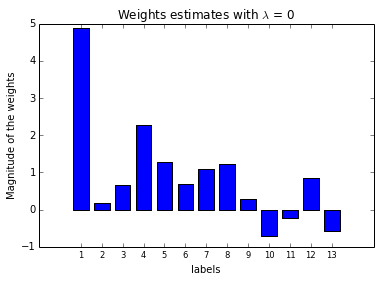

In [232]:
# Plot the weights from the ridge regression
N = len(LASSO_weights0)
x = range(1,N+1)
width = 0.75
W1 = [str(a) for a in x]
plt.bar(range(len(LASSO_weights0)),LASSO_weights0, width, color="blue",align='center')

plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title = "Mean of the \n noise")
plt.xlabel('labels')
plt.ylabel('Magnitude of the weights')
plt.title('Weights estimates with $\lambda$ = 0')
#plt.yscale('log')
#plt.show()
pl.savefig('../ImageFiles/HW1/Lamda_0_Question4.pdf')
